Practice Project - 3

# Medical Cost Personal Insurance Datasets

Problem Statement:
Insurance Forecast by using Linear Regression

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/medical_cost_insurance.csv")


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


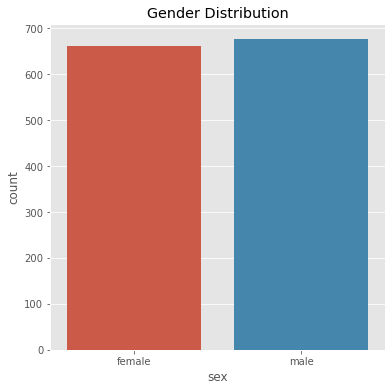

In [20]:
plt.figure(figsize=(6,6))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

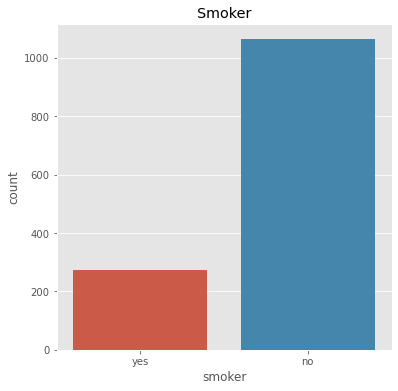

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

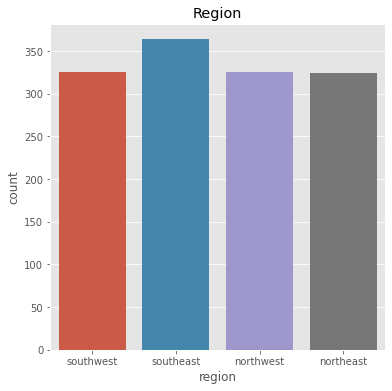

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

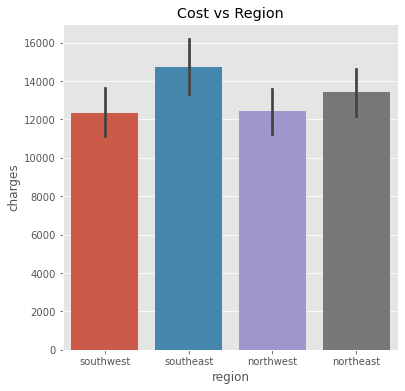

In [22]:
plt.figure(figsize=(6,6))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')


Text(0.5, 1.0, 'Charges for smokers')

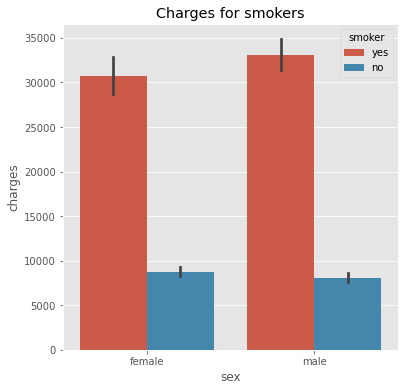

In [25]:
plt.figure(figsize=(6,6))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

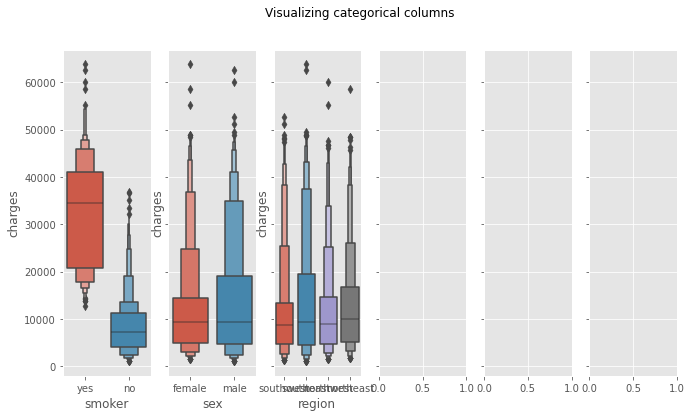

In [33]:
fig, axes = plt.subplots(1,6, figsize=(11,6), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

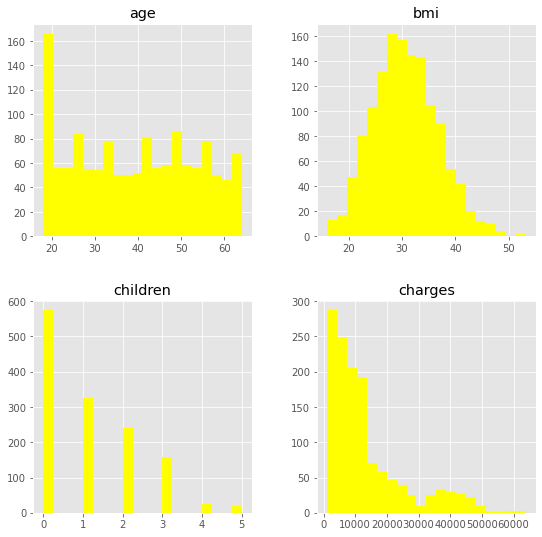

In [35]:
df[['age','bmi','children','charges']].hist(bins=20, figsize=(9,9), color='yellow')
plt.show()

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df['sex'] = df['sex'].apply({'male':3, 'female':2}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':3, 'southeast':1, 'northwest':7, 'northeast':3}.get)

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,None,27.900,0,None,None,16884.92400
1,18,None,33.770,1,None,None,1725.55230
2,28,None,33.000,3,None,None,4449.46200
3,33,None,22.705,0,None,None,21984.47061
4,32,None,28.880,0,None,None,3866.85520


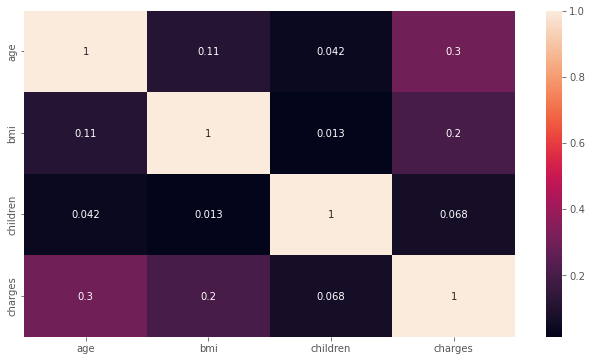

In [46]:
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [48]:
X = df.drop(['charges', 'sex'], axis=1)
y = df.charges


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=40)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (802, 5)
X_test shape:  (536, 5)
y_train shpae:  (802,)
y_test shape:  (536,)


In [81]:
linreg = LinearRegression()

In [66]:
from sklearn.linear_model import LinearRegression


In [68]:
X_test.fillna(X_train.mean(), inplace=True)

In [70]:
X_test = X_test.fillna(X_train.mean())

In [72]:
X_test._is_view

False

In [82]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [58]:
from sklearn.metrics import r2_score

In [67]:
print("R2 score: ",(r2_score(y_test, pred)))

NameError: name 'pred' is not defined

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("R2 score: ",(r2_score(y_test, pred)))

In [ ]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [ ]:
data = {'age':50, 'bmi':21, 'children':3, 'smoker':1, 'region':3}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

In [ ]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)